Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



Collecting and Processing Data

In [ ]:
#Loading the CSV file data into a Panda Dataframe
heartData = pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
#printing the first 5 rows of the dataset
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#printing the last 5 rows of the dataset
heartData.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#number of rows and columns in the dataset
heartData.shape

(303, 14)

In [ ]:
#more info about the data
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#cleaning data by checking for missing values
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistics about the data
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking distribution of the target variable
heartData['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart(Heart Disease)

0 --> Healthy Heart

Visualizing the Data

<Axes: xlabel='target', ylabel='age'>

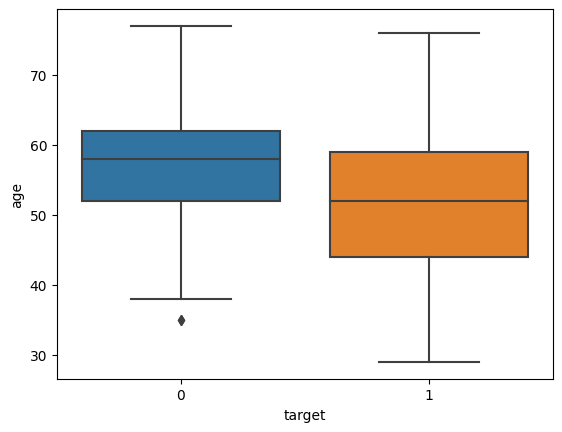

In [ ]:

sns.boxplot(y=heartData["age"], x=heartData["target"])

Splitting the Features and Target

In [ ]:
X = heartData.drop(columns='target', axis=1)
Y = heartData['target']


In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Training and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(303, 13) (242, 13) (61, 13)
(303,) (242,) (61,)


Scaling the Features

In [ ]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)
print (xtrain[0:10, :])

[[-0.04180248  0.69617712  0.04467671 -1.34872217  1.17731284 -0.39735971
   0.87935746  0.24943122 -0.68964466 -0.89200846  0.96628239 -0.69876652
   1.18825929]
 [ 2.48724773  0.69617712 -0.93821081 -0.33840844  1.08399161 -0.39735971
  -1.00386825  0.52277019  1.4500221  -0.89200846  0.96628239  2.28537756
  -0.50326276]
 [ 0.17811493  0.69617712  0.04467671 -0.63555954 -0.1105201  -0.39735971
   0.87935746  0.84166566 -0.68964466 -0.89200846 -2.30421185 -0.69876652
  -0.50326276]
 [ 0.39803234  0.69617712  0.04467671 -0.33840844 -0.48380501 -0.39735971
   0.87935746 -0.29724672 -0.68964466 -0.53725736 -0.66896473  3.28009226
   1.18825929]
 [ 0.06815622 -1.43641607 -0.93821081 -0.16011778 -0.76376869 -0.39735971
   2.76258318 -0.93503765  1.4500221   0.88174706 -0.66896473  0.29594817
   1.18825929]
 [ 0.50799104  0.69617712  1.02756422 -0.27897822 -0.5211335   2.51661148
   0.87935746 -0.75281167 -0.68964466  1.05912262 -0.66896473  0.29594817
  -2.1947848 ]
 [ 1.16774327 -1.43641

Handling Imbalanced Classes

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

Before OverSampling, counts of label '1': 132
Before OverSampling, counts of label '0': 110 

After OverSampling, the shape of train_X: (264, 13)
After OverSampling, the shape of train_y: (264,) 

After OverSampling, counts of label '1': 132
After OverSampling, counts of label '0': 132


Training the model using Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
#training the model using the training data
model.fit(X_train_res, Y_train_res.ravel())

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Model Evaluation using Accuracy Score

In [ ]:
X_training_prediction = model.predict(X_train_res)
training_data_accuracy = accuracy_score(X_training_prediction, Y_train_res)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8371212121212122


In [ ]:
X_testing_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_testing_prediction, Y_test)

In [ ]:
print('Accuracy on Testing data : ', testing_data_accuracy)

Accuracy on Testing data :  0.8360655737704918


Building a system that can predict Heart Disease

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
numpy_array_of_input_data = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
reshaped_input_data = numpy_array_of_input_data.reshape(1,-1)
print(reshaped_input_data)

prediction = model.predict(reshaped_input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
    2. ]]
[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
